In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv("Final.csv")
dataset.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [4]:
datasetNew = dataset.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'Lipids_Res','Total_RF', 'BP_res'], axis=1)
datasetNew = datasetNew.drop(['A1C_RF', 'BP_RF', 'Lip_RF', 'Alb_RF'], axis=1)
datasetNew['PerformedDate'] = pd.to_datetime(datasetNew['PerformedDate'], infer_datetime_format=True)

In [13]:
indexedDataset = datasetNew

In [14]:
filt_df = indexedDataset.loc[:, indexedDataset.columns != 'PerformedDate']
low = .25
high = .75

quant_df = filt_df.quantile([low, high])
print(quant_df)
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
filt_df = pd.concat([indexedDataset.loc[:,'PerformedDate'], filt_df], axis=1)
filt_df.dropna(inplace=True)
print(filt_df)

      a1c_Res
0.25     61.0
0.75     76.0
        PerformedDate  a1c_Res
3344187    2016-10-14     68.0
3344188    2016-09-12     71.0
3344189    2016-07-15     72.0
3344191    2014-06-02     72.0
3344197    2019-04-07     75.0
...               ...      ...
4863599    2019-10-15     63.0
4863602    2018-05-04     66.0
4863603    2017-03-24     68.0
4863604    2017-10-18     71.0
4863606    2019-04-24     74.0

[655868 rows x 2 columns]


In [16]:
indexedDataset = filt_df.set_index(['PerformedDate'])

In [17]:
from datetime import datetime

In [18]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               a1c_Res
PerformedDate         
2016-10-14        68.0
2016-09-12        71.0
2016-07-15        72.0
2014-06-02        72.0
2019-04-07        75.0
...                ...
2019-10-15        63.0
2018-05-04        66.0
2017-03-24        68.0
2017-10-18        71.0
2019-04-24        74.0

[655868 rows x 1 columns]


In [19]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               a1c_Res
PerformedDate         
1995-09-26        62.0
1995-09-29        65.0
1995-10-10        74.0
1995-10-19        72.0
1995-10-26        64.0
...                ...
2019-12-31        62.0
2019-12-31        72.0
2019-12-31        67.0
2019-12-31        63.0
2019-12-31        63.0

[655868 rows x 1 columns]


               a1c_Res
PerformedDate         
2018-03-01        67.0
2018-03-01        66.0
2018-03-01        66.0
2018-03-01        69.0
2018-03-01        73.0
...                ...
2018-03-31        66.0
2018-03-31        74.0
2018-03-31        62.0
2018-03-31        73.0
2018-03-31        73.0

[6338 rows x 1 columns]


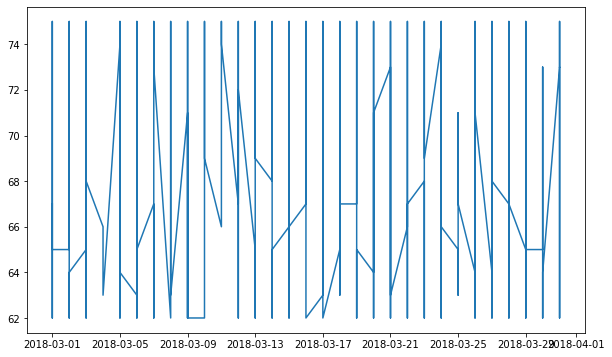

In [28]:
sub = indexedDataset['2018-03' : '2018-03']
print(sub)
plt.plot(sub)

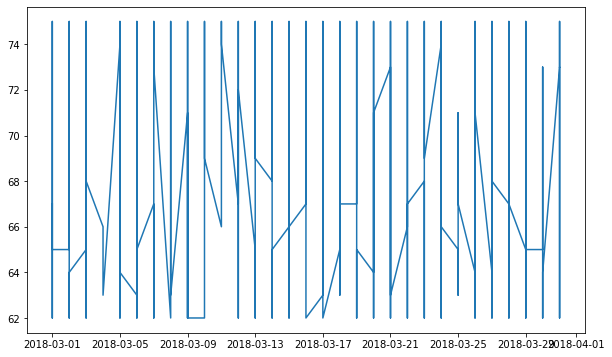

In [39]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['a1c_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [41]:
indexedDataset = new2
print(indexedDataset)

               a1c_Res
PerformedDate         
2018-03-01        67.0
2018-03-01        66.0
2018-03-01        66.0
2018-03-01        69.0
2018-03-01        73.0
...                ...
2018-03-31        66.0
2018-03-31        74.0
2018-03-31        62.0
2018-03-31        73.0
2018-03-31        73.0

[6338 rows x 1 columns]


In [43]:
print(indexedDataset.max())
print(indexedDataset.min())

a1c_Res    75.0
dtype: float64
a1c_Res    62.0
dtype: float64


In [44]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

                 a1c_Res
PerformedDate           
2018-03-01           NaN
2018-03-01           NaN
2018-03-01           NaN
2018-03-01           NaN
2018-03-01           NaN
...                  ...
2018-03-31     67.000000
2018-03-31     67.416667
2018-03-31     67.416667
2018-03-31     68.333333
2018-03-31     69.083333

[6338 rows x 1 columns]                 a1c_Res
PerformedDate          
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
...                 ...
2018-03-31     3.954284
2018-03-31     4.420167
2018-03-31     4.420167
2018-03-31     4.334499
2018-03-31     4.294994

[6338 rows x 1 columns]


In [45]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

                a1c_Res
PerformedDate          
2018-03-01     4.204693
2018-03-01     4.189655
2018-03-01     4.189655
2018-03-01     4.234107
2018-03-01     4.290459
...                 ...
2018-03-31     4.189655
2018-03-31     4.304065
2018-03-31     4.127134
2018-03-31     4.290459
2018-03-31     4.290459

[6338 rows x 1 columns]


In [46]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

                a1c_Res
PerformedDate          
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
...                 ...
2018-03-31     4.203132
2018-03-31     4.208962
2018-03-31     4.208962
2018-03-31     4.222572
2018-03-31     4.233537

[6338 rows x 1 columns]                 a1c_Res
PerformedDate          
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
2018-03-01          NaN
...                 ...
2018-03-31     0.058028
2018-03-31     0.064568
2018-03-31     0.064568
2018-03-31     0.062945
2018-03-31     0.062299

[6338 rows x 1 columns]


In [47]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,a1c_Res
PerformedDate,
2018-03-01,0.100485
2018-03-01,0.078781
2018-03-01,-0.049625
2018-03-01,0.006390
2018-03-01,-0.006992
2018-03-01,-0.042440
2018-03-01,-0.085755
2018-03-01,0.017513
2018-03-01,0.007677


In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['a1c_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

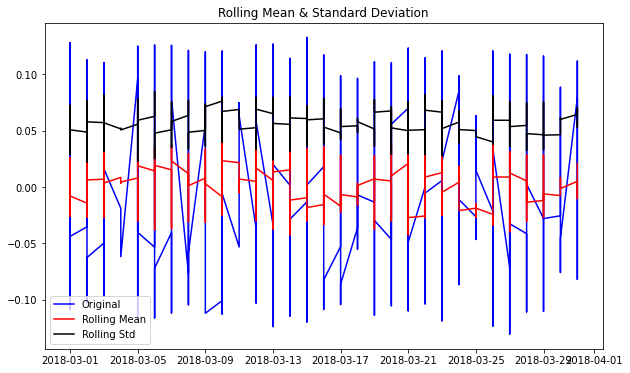

Results of Dickey-Fuller Test:
Test Statistic                  -21.361972
p-value                           0.000000
#Lags Used                       34.000000
Number of Observations Used    6292.000000
Critical Value (1%)              -3.431390
Critical Value (5%)              -2.861999
Critical Value (10%)             -2.567015
dtype: float64


In [49]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

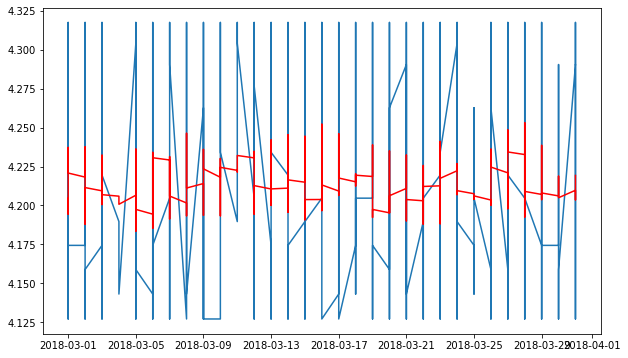

In [50]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

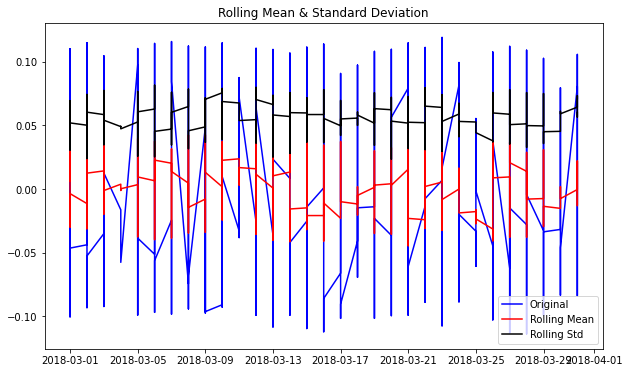

Results of Dickey-Fuller Test:
Test Statistic                -1.793614e+01
p-value                        2.871624e-30
#Lags Used                     3.400000e+01
Number of Observations Used    6.303000e+03
Critical Value (1%)           -3.431388e+00
Critical Value (5%)           -2.861999e+00
Critical Value (10%)          -2.567014e+00
dtype: float64


In [51]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

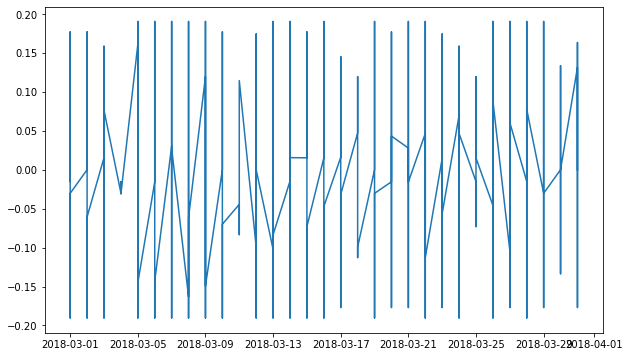

In [52]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

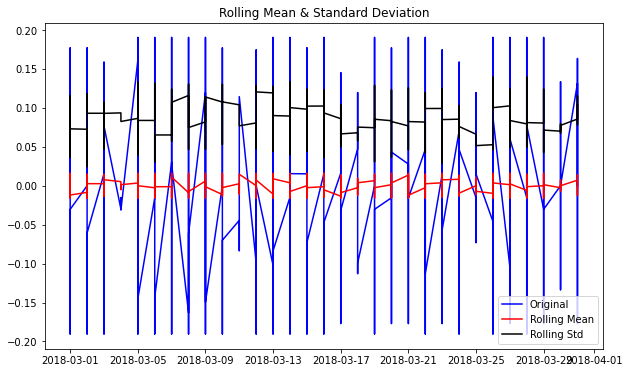

Results of Dickey-Fuller Test:
Test Statistic                  -25.042047
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    6306.000000
Critical Value (1%)              -3.431387
Critical Value (5%)              -2.861998
Critical Value (10%)             -2.567014
dtype: float64


In [53]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-69-b8fbacf31286>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-69-b8fbacf31286>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


               a1c_Res
PerformedDate         
2018-03-01         0.0
2018-03-01         0.0
2018-03-01         0.0
2018-03-01         0.0
2018-03-01         0.0
...                ...
2018-03-31         0.0
2018-03-31         0.0
2018-03-31         0.0
2018-03-31         0.0
2018-03-31         0.0

[6338 rows x 1 columns]


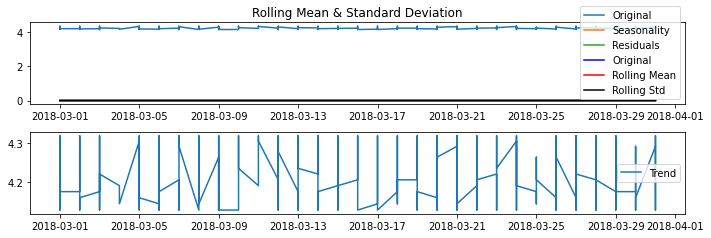

Results of Dickey-Fuller Test:
Test Statistic                         NaN
p-value                                NaN
#Lags Used                        0.000000
Number of Observations Used    6337.000000
Critical Value (1%)              -3.431382
Critical Value (5%)              -2.861996
Critical Value (10%)             -2.567013
dtype: float64


c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [69]:
import statsmodels as sm
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

decomposition = seasonal_decompose(indexedDataset_logScale, period = 1 ) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
s = pd.DataFrame(decomposedLogData)
df = s.rename(columns={"resid": "a1c_Res"})
print(df)
test_stationarity(df)

In [54]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


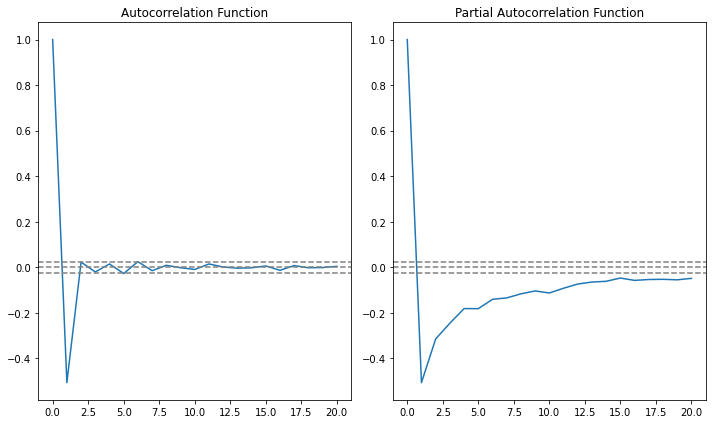

In [55]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


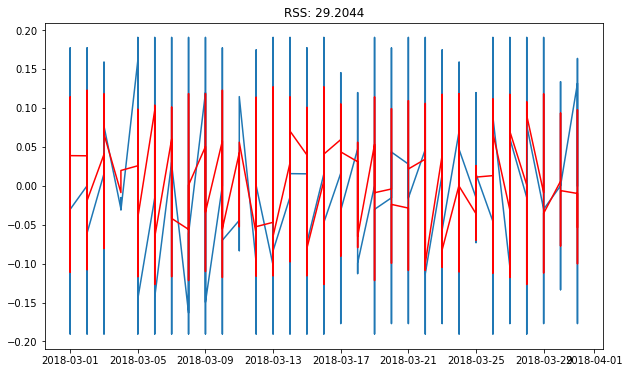

In [56]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['a1c_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


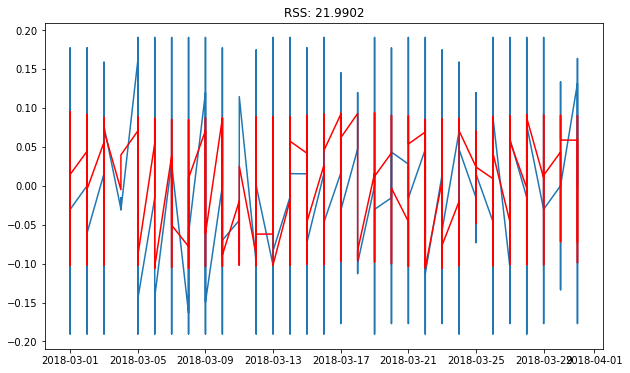

In [57]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['a1c_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\users\susu1\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning

Text(0.5, 1.0, 'RSS: 21.9742')

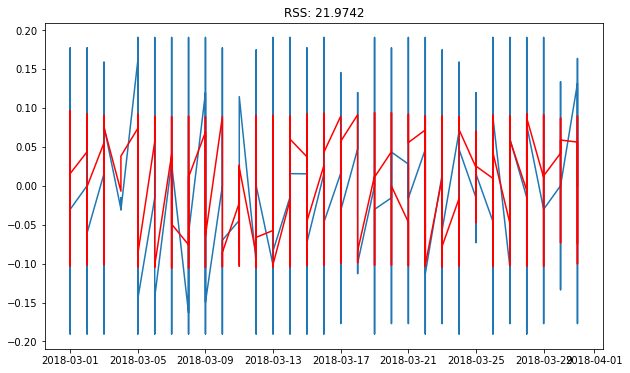

In [59]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['a1c_Res'])**2))

In [60]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-03-01    1.799126e-07
2018-03-01    7.466983e-03
2018-03-01    4.990171e-03
2018-03-01   -2.932298e-02
2018-03-01   -6.820030e-02
dtype: float64


In [61]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-03-01    1.799126e-07
2018-03-01    7.467163e-03
2018-03-01    1.245733e-02
2018-03-01   -1.686564e-02
2018-03-01   -8.506594e-02
dtype: float64


In [62]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-03-01    4.204693
2018-03-01    4.212160
2018-03-01    4.217150
2018-03-01    4.187827
2018-03-01    4.119627
dtype: float64

In [63]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
print(predictions_ARIMA)

PerformedDate
2018-03-01     67.000012
2018-03-01     67.502173
2018-03-01     67.839862
2018-03-01     65.879478
2018-03-01     61.536265
                 ...    
2018-03-31    167.267786
2018-03-31    171.983742
2018-03-31    157.873125
2018-03-31    172.719411
2018-03-31    160.698858
Length: 1749311, dtype: float64


In [65]:
j = (predictions_ARIMA-indexedDataset['a1c_Res'])**2
#print(j)
k = len(indexedDataset['a1c_Res'])
#print(k)
u = sum(j/k)
#print(u)
rmse = np.sqrt(u)

In [66]:
print(rmse)

197786.522143488


Text(0.5, 1.0, 'RMSE: 197786.5221')

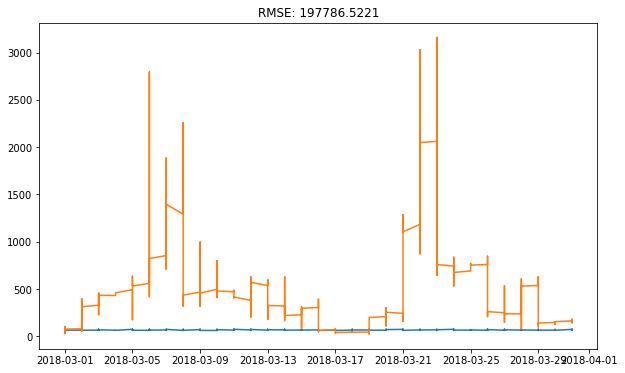

In [67]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% rmse)